In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
rosette_df = pd.read_csv('../data/rosetteArea.csv')
for col in rosette_df.columns:
    print(col)

Date
Plant
Rosette area (cm2)
Scale reference
pixels/cm
min. luminosity
max. luminosity
min. green-red
max. green-red
min. blue-yellow
max. blue-yello
min. size (cm2)
Include holes?
End date of stratification
Days after stratification
mutant_wt


In [65]:
mutant = '1.10.18'
data = rosette_df[(rosette_df['Plant']=='wt') | (rosette_df['Plant']==mutant)]

/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/categorical.py:1172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


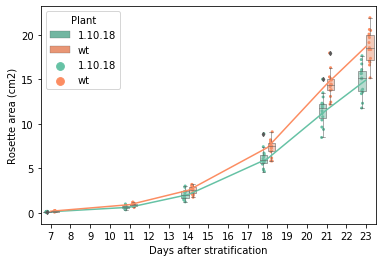

In [66]:
ax1 = sns.boxplot(x='Days after stratification', y='Rosette area (cm2)', data=rosette_df, hue='Plant',
                    hue_order = [mutant, 'wt'], palette="Set2", order=np.arange(7,24), linewidth=0.5, fliersize=3)
sns.lineplot(x=rosette_df['Days after stratification']-7, y='Rosette area (cm2)', data=rosette_df, hue='Plant', 
                    hue_order = [mutant, 'wt'], palette="Set2", ax=ax1, legend=False, ci=None)
sns.stripplot(x='Days after stratification', y='Rosette area (cm2)', data=rosette_df, hue='Plant', ax=ax1, zorder=0,
                    hue_order = [mutant, 'wt'], jitter=True, linewidth=0, palette="Set2", dodge=True, order=np.arange(7,24),
                    size=3)

# Make boxplots transparent
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))


In [2]:
rosette_df = pd.read_csv('../data/rosetteAreaWithAdditionalCategory.csv')

Date
object
Plant
object
Rosette area (cm2)
float64
Scale reference
object
pixels/cm
float64
min. luminosity
int64
max. luminosity
int64
min. green-red
int64
max. green-red
int64
min. blue-yellow
int64
max. blue-yello
int64
min. size (cm2)
float64
Include holes?
object
End date of stratification
object
Days after stratification
int64
mutant_wt
object
Line
object


/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


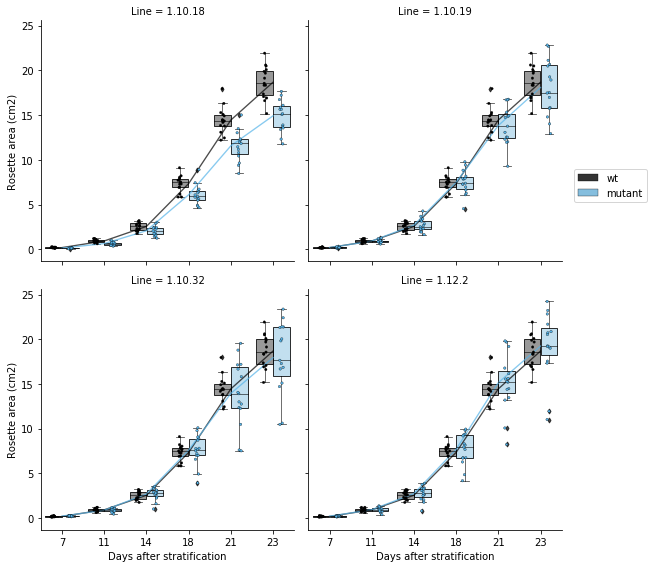

In [12]:
colours = ['#000000', '#56B4E9']

grid = sns.FacetGrid(rosette_df, col="Line", col_order=['1.10.18', '1.10.19', '1.10.32', '1.12.2'], col_wrap=2, 
                    size=4, aspect=1)

boxplot = grid.map(sns.boxplot, 'Days after stratification', 'Rosette area (cm2)', data=rosette_df, 
      hue='mutant_wt', hue_order=['wt', 'mutant'], palette=colours, fliersize=3.5, linewidth=0.8)

for i, ax in enumerate(grid.axes.flat):
    for patch in ax.artists:
        red, green, blue, alpha = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, .4))
    
    if i == 0:
        Line = '1.10.18'
    if i == 1:
        Line = '1.10.19'
    if i == 2: 
        Line = '1.10.32'
    if i == 3:
        Line = '1.12.2'
    sns.pointplot(x=rosette_df['Days after stratification']-7, y='Rosette area (cm2)', data=rosette_df[rosette_df['Line'] == Line],
                 hue='mutant_wt', hue_order = ['wt', 'mutant'], ax=ax, palette=colours, estimator=np.mean, 
                 markers="", dodge=False, join=True, scale=0.5, errwidth=0)
    plt.setp(ax.lines, alpha=.7)

stripplot = grid.map(sns.stripplot, 'Days after stratification', 'Rosette area (cm2)', data=rosette_df, 
      hue='mutant_wt', hue_order=['wt', 'mutant'], size=2.5, alpha=1, jitter=True, linewidth=0.3, 
      dodge=True, palette=colours, edgecolor='gray')

handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
for lh in leg.legendHandles: 
    lh.set_alpha(.8)


    
    # plt.autoscale()

# for ax in grid.axes.flat:
#     labels = ax.get_xticklabels() 
#     for i,l in enumerate(labels):
#         if(i%2 != 0): labels[i] = '' # skip even labels
#     ax.set_xticklabels(labels, rotation=30) # set new labels

#order=np.arange(7,24)
# x=rosette_df['Days after stratification']-7